# Fraud Analytics - Deepanshu Goyal (11920007)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# 1. Understand the data

In [2]:
data = pd.read_csv('creditcard.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
data['log_amount'] = np.log(data['Amount'])
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,log_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.008099
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.989541
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.936639
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.816241
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.248352


In [4]:
#Count the number of legitimate and fraudulent transactions in the dataset
data.groupby('Class').count()['Time']

Class
0    284315
1       492
Name: Time, dtype: int64

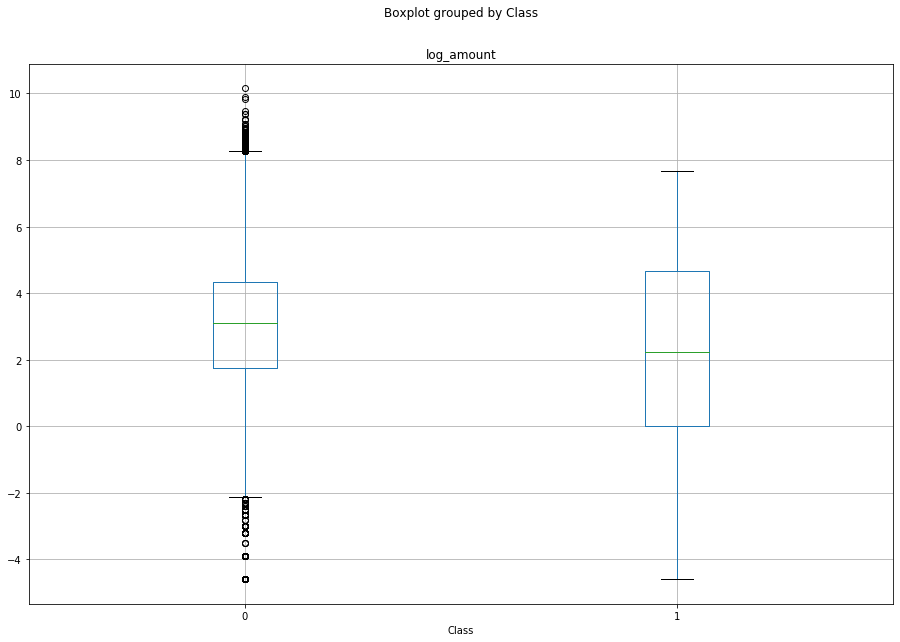

In [5]:
# See transaction pattern in genuine and fraudulent cases
data.boxplot(column='log_amount',by='Class',figsize=(15,10))

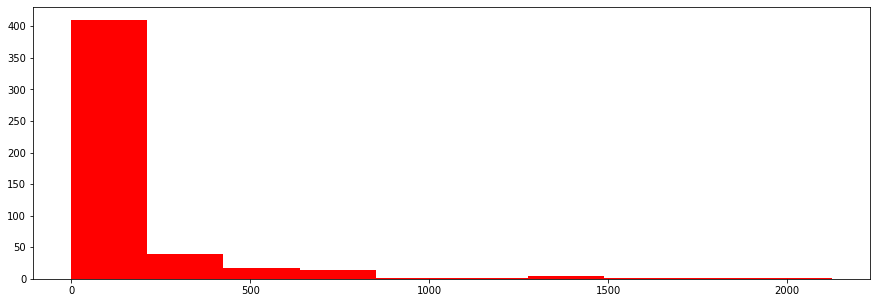

In [6]:
# Distribution of Fraudulent Transactions
plt.figure(figsize=(15,5))
plt.hist(data[data['Class']==1]['Amount'],bins=10,color='red')
plt.show()

In [7]:
# Number of fraud transactions less than 100 pounds
sum(data[data['Class']==1]['Amount']<200)/sum(data['Class']==1)

0.8272357723577236

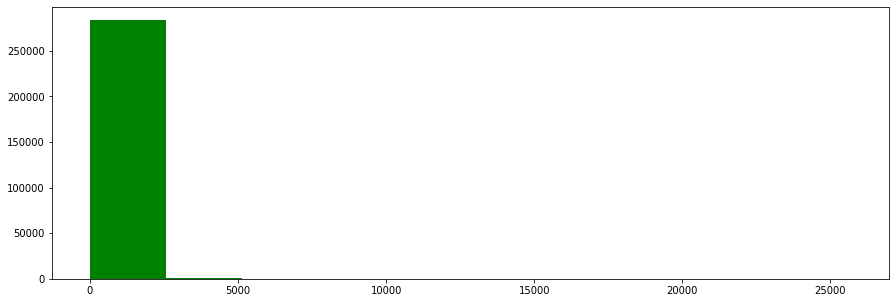

In [8]:
# Distribution of genuine Transactions
plt.figure(figsize=(15,5))
plt.hist(data[data['Class']==0]['Amount'],bins=10,color='green')
plt.show()

In [9]:
# Percentage of fraud transactions less than 500 pounds
sum(data[data['Class']==0]['Amount']<200)/sum(data['Class']==0)

0.8971914953484691

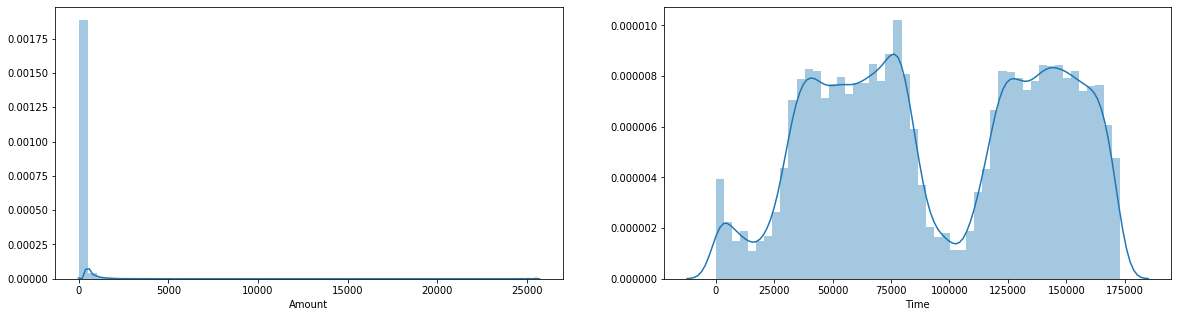

In [10]:
# Distribution of Time and Amount
fig, axs = plt.subplots(ncols=2,figsize=(20,5))
sns.distplot(data['Amount'],ax=axs[0])
sns.distplot(data['Time'],ax=axs[1])

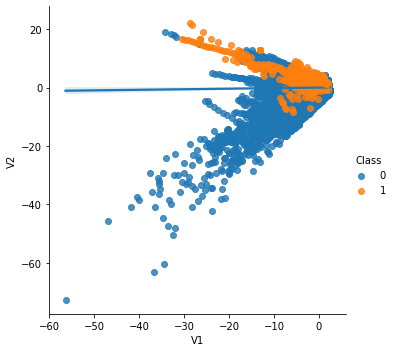

In [56]:
# scatter plot using first 2 dimensions of PCA
sns.lmplot('V1', 'V2', data=data, hue='Class')
plt.show()

# Observations after EDA
1. There are 284807 records with no missing data in the dataset
2. There are 492 fraudulent records and 284315 legitimate transactions i.e. 0.17% of total number of transactions
3. ~83% of the fraud transactions are less than £200
4. ~90% of the genuine transactions are less than £200
5. Both high value and low value fraud transactions happened

# 2. Split the dataset into Test and Train Dataset

In [11]:
X = data.drop(['Class','log_amount'],axis=1)
y = data['Class']

In [12]:
# Split the test and train data into 70% and 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100, stratify=y)

# 3. Handle imbalance in the trainig dataset using different techniques such as

1. Random Under-sample
2. Random Over-sample
3. SMOTE Over-sample
4. SVMSOTE Over-sample
5. Borderline SMOTE Over-sample

In [13]:
# Random Undersampling Technique
us_train_df = X_train.copy()
us_train_df['Class'] = y_train

# Undersample majority class to match fraud transactions count
from sklearn.utils import resample

us_majority = us_train_df[us_train_df['Class']==0]
us_minority = us_train_df[us_train_df['Class']==1]
print(us_minority.shape[0])

us_majority_f = resample(us_majority, replace=True, n_samples=344,random_state=100)
final_undersample_df = pd.concat([us_majority_f,us_minority])

#Print final undersample dataset
us_X = final_undersample_df.drop('Class',axis=1)
us_y = final_undersample_df['Class']

print('Number of Fraud Transactions:',sum(us_y==1))
print('Number of Genuine Transactions:',sum(us_y==0))

344
Number of Fraud Transactions: 344
Number of Genuine Transactions: 344


In [14]:
# Oversample minority class to match genuine transactions using Random Oversample
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=100)

ros_X,ros_y = ros.fit_sample(X_train,y_train)

print('Number of Fraud Transactions:',sum(ros_y==1))
print('Number of Genuine Transactions:',sum(ros_y==0))

Number of Fraud Transactions: 199020
Number of Genuine Transactions: 199020


In [15]:
# Oversample minority class to match genuine transactions using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=200)

smote_X,smote_y = smote.fit_sample(X_train,y_train)

print('Number of Fraud Transactions:',sum(smote_y==1))
print('Number of Genuine Transactions:',sum(smote_y==0))

Number of Fraud Transactions: 199020
Number of Genuine Transactions: 199020


In [16]:
# Oversample minority class to match genuine transactions using SVMSMOTE
from imblearn.over_sampling import SVMSMOTE
svmsmote = SVMSMOTE(random_state=300)

svmsmote_X,svmsmote_y = svmsmote.fit_resample(X_train,y_train)

print('Number of Fraud Transactions:',sum(svmsmote_y==1))
print('Number of Genuine Transactions:',sum(svmsmote_y==0))

Number of Fraud Transactions: 199020
Number of Genuine Transactions: 199020


In [17]:
# Oversample minority class to match genuine transactions using Borderline SMOTE
from imblearn.over_sampling import BorderlineSMOTE
bsmote = BorderlineSMOTE(random_state=400)

bsmote_X,bsmote_y = bsmote.fit_resample(X_train,y_train)

print('Number of Fraud Transactions:',sum(bsmote_y==1))
print('Number of Genuine Transactions:',sum(bsmote_y==0))

Number of Fraud Transactions: 199020
Number of Genuine Transactions: 199020


# 4. Data Modelling & Prediction
1. Logistic Regression
2. Random Forest
3. Naive Bayes

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

def get_scores(predicted, y_test):
    
    print(confusion_matrix(y_test,predicted,labels=[1,0]))
    print ("accuracy: ", str(accuracy_score(y_test, predicted)))
    print ("precision: ", str(precision_score(y_test, predicted)))
    print ("recall: ", str(recall_score(y_test, predicted)))
    print ("AUC: ", str(roc_auc_score(y_test, predicted)))
    print("F1_Score: ", str(f1_score(y_test, predicted, average='macro')))
    return

# Logistic Regression

In [19]:
# Implement logistic Regression Model
from sklearn.linear_model import LogisticRegression

def logistic_regression(X_train, X_test, y_train, y_test):
    lr = LogisticRegression(random_state=1).fit(X_train,y_train)
    y_predicted = lr.predict(X_test)

    # Print model scores
    get_scores(y_predicted, y_test)
    

In [20]:
# Logistic Regression on actual train data without oversampling & under sampling
logistic_regression(X_train,X_test, y_train,y_test)

[[   98    50]
 [   40 85255]]
accuracy:  0.9989466661985184
precision:  0.7101449275362319
recall:  0.6621621621621622
AUC:  0.8308466007481191
F1_Score:  0.8423935677452676


In [21]:
# Logistic Regression for random undersampling data
logistic_regression(us_X,X_test,us_y,y_test)

[[  131    17]
 [ 3199 82096]]
accuracy:  0.9623608721603877
precision:  0.03933933933933934
recall:  0.8851351351351351
AUC:  0.9238150029389257
F1_Score:  0.5280600491658302


In [22]:
# Logistic Regression using random oversampling
logistic_regression(ros_X, X_test, ros_y, y_test)

[[  132    16]
 [ 2703 82592]]
accuracy:  0.9681776154863476
precision:  0.04656084656084656
recall:  0.8918918918918919
AUC:  0.930100937446034
F1_Score:  0.5361538173523074


In [23]:
# Logistic Regression using SMOTE
logistic_regression(smote_X, X_test, smote_y, y_test)

[[  129    19]
 [ 1691 83604]]
accuracy:  0.9799866577718479
precision:  0.07087912087912088
recall:  0.8716216216216216
AUC:  0.925898154734839
F1_Score:  0.5604871529525511


In [24]:
# Logistic Regression using SVMSMOTE
logistic_regression(svmsmote_X, X_test, svmsmote_y, y_test)

[[  124    24]
 [  785 84510]]
accuracy:  0.9905316994955702
precision:  0.13641364136413642
recall:  0.8378378378378378
AUC:  0.9143172423845382
F1_Score:  0.6149313428428116


In [25]:
# Logistic Regression using Borderline SMOTE
logistic_regression(bsmote_X, X_test, bsmote_y, y_test)

[[  128    20]
 [ 1200 84095]]
accuracy:  0.9857214751354705
precision:  0.0963855421686747
recall:  0.8648648648648649
AUC:  0.9253980224435703
F1_Score:  0.5831201352566031


# Random Forest

In [26]:
# Implement RandomForest Model
from sklearn.ensemble import RandomForestClassifier

def rf(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=10,random_state=1).fit(X_train,y_train)
    y_predicted = rf.predict(X_test)

    # Print model scores
    get_scores(y_predicted, y_test)

In [27]:
# Random Forest on actual data without undersampling or oversampling
rf(X_train,X_test, y_train,y_test)

[[  107    41]
 [    6 85289]]
accuracy:  0.9994499256814484
precision:  0.9469026548672567
recall:  0.722972972972973
AUC:  0.8614513144365422
F1_Score:  0.9098239568860258


In [28]:
# Random Forest for random undersampling data
rf(us_X,X_test,us_y,y_test)

[[  130    18]
 [ 2352 82943]]
accuracy:  0.9722622098943156
precision:  0.052377115229653506
recall:  0.8783783783783784
AUC:  0.9254017456110194
F1_Score:  0.5423868183119838


In [29]:
# Random Forest using random oversampling
rf(ros_X, X_test, ros_y, y_test)

[[  119    29]
 [   11 85284]]
accuracy:  0.9995318516437859
precision:  0.9153846153846154
recall:  0.8040540540540541
AUC:  0.9019625449354624
F1_Score:  0.9279403261597793


In [30]:
# Random Forest using SMOTE
rf(smote_X, X_test, smote_y, y_test)

[[  121    27]
 [   20 85275]]
accuracy:  0.9994499256814484
precision:  0.8581560283687943
recall:  0.8175675675675675
AUC:  0.9086665436173027
F1_Score:  0.9185473695641561


In [31]:
# Random Forest using SVMSMOTE
rf(svmsmote_X, X_test, svmsmote_y, y_test)

[[  115    33]
 [   10 85285]]
accuracy:  0.9994967405170698
precision:  0.92
recall:  0.777027027027027
AUC:  0.888454893430273
F1_Score:  0.9211194050567368


In [32]:
# Random Forest using Borderline SMOTE
rf(bsmote_X, X_test, bsmote_y, y_test)

[[  115    33]
 [   10 85285]]
accuracy:  0.9994967405170698
precision:  0.92
recall:  0.777027027027027
AUC:  0.888454893430273
F1_Score:  0.9211194050567368


# Naive Bayes

In [35]:
# Implement Naive Bayes
from sklearn.naive_bayes import GaussianNB

def nb(X_train, X_test, y_train, y_test):
    nb = GaussianNB().fit(X_train,y_train)
    y_predicted = nb.predict(X_test)

    # Print model scores
    get_scores(y_predicted, y_test)

In [36]:
# Naive Bayes on actual data without undersampling or oversampling
nb(X_train,X_test, y_train,y_test)

[[   87    61]
 [  627 84668]]
accuracy:  0.9919478482731178
precision:  0.12184873949579832
recall:  0.5878378378378378
AUC:  0.7902434396997384
F1_Score:  0.5989048304685907


In [37]:
# Naive Bayes for random undersampling data
nb(us_X,X_test,us_y,y_test)

[[  101    47]
 [  685 84610]]
accuracy:  0.9914328850812822
precision:  0.12849872773536897
recall:  0.6824324324324325
AUC:  0.8372007405142408
F1_Score:  0.6059834957304484


In [38]:
# Naive Bayes using random oversampling
nb(ros_X, X_test, ros_y, y_test)

[[   98    50]
 [  843 84452]]
accuracy:  0.9895485879475205
precision:  0.10414452709883103
recall:  0.6621621621621622
AUC:  0.8261394080639054
F1_Score:  0.5873612066108239


In [39]:
# Naive Bayes using SMOTE
nb(smote_X, X_test, smote_y, y_test)

[[  105    43]
 [  626 84669]]
accuracy:  0.9921702187423195
precision:  0.1436388508891929
recall:  0.7094594594594594
AUC:  0.8510601125188733
F1_Score:  0.6174863588732775


In [40]:
# Naive Bayes using SVMSMOTE
nb(svmsmote_X, X_test, svmsmote_y, y_test)

[[   83    65]
 [  196 85099]]
accuracy:  0.9969453319757031
precision:  0.2974910394265233
recall:  0.5608108108108109
AUC:  0.7792564517738912
F1_Score:  0.6936138111078597


In [41]:
# Naive Bayes using Borderline SMOTE
nb(bsmote_X, X_test, bsmote_y, y_test)

[[   87    61]
 [  378 84917]]
accuracy:  0.9948620717905504
precision:  0.1870967741935484
recall:  0.5878378378378378
AUC:  0.7917030797724273
F1_Score:  0.6406358528994638
